<a href="https://colab.research.google.com/github/zefwang/ds3000_project/blob/master/DS3000_FP4_Section2_Group1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h2> DS 3000 - Spring 2019</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> NYC Employment Data</h3> </center>
<center><h4>Caroline Ghio, Preston Rakovsky, Zefeng Wang</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

For our project, we chose to look at data describing the job postings for New York City public agencies. We believe that this data informs how different fields pay their employees, how wage varies depending on experience and education, and how public organizations pay. We made hypotheses about how the salary for a position can be affected by the required experience, the specific agency, title, etc. Our feature variables include these aforementioned conditions and the target variable for our linear regression models was the salary. We used data cleaning methods such as one-hot encoding to take advantage of the qualitative variables included in the data set. Finally, we trained linear regression models, such as the KNeighborsRegressor, Ridge, and Lasso regression models. From testing this data, we were able to see the best results for the Ridge regression, as determined by the closeness in R^2 scores for the training and testing sets without overfitting. Since the r^2 value was only ~.25, we can conclude that there was not strong correlation between these feature variables and the average salary for any position.

<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

### Problem Statement
Our project topic is ‘New York City Jobs.' Many employers are looking for specific skills for positions that many candidates don't have. Likewise, job candidates are not clear what a certain title or description means or how that translates into their pay. By having this data set of hundreds of positions with different titles and requirements, we can find patterns in what different jobs are looking for and what these positions, titles, and levels are willing to pay individuals. We also hope to observe the difference in annual pay in the agencies and fields.

### Significance of the Problem
There are over 5.8 million unemployed Americans as of March 2020. It is also estimated that around 33% of college graduates are underemployed. We hope to use our findings to enable these people to be more informed in their opportunities. These insights can be useful too for educating people about the fields they may want to enter in their future. For example, people hear a lot about the high salaries in the computer science field, but is the hype accurate?

### Questions/Hypothesis

#### Questions
   - What features (including agency, posting type, business title, civil service title, level, job category, division work unit, job description, minimum requirements, and preferred skills) have the most impact on wage in New York City Public Employment positions?
   - Do certain words or phrases in business titles indicate that a position will pay more?
   - Does more experience and/or education correlate with a higher wage?
   - Do certain agencies pay more than others amongst public agencies in New York City?
   
#### Hypotheses
   - Titles that include the word “Executive” or “Director” will pay more on average than position titles that do not include these words.
   - Jobs that require a higher level of education (baccalaureate, masters, or PhD) or more years of experience will have a higher wage.
   - Jobs related to technology (in the Department of Information Technology and Telecommunications or classified as Technology, Data & Innovation in the job category) will pay more than positions in other departments or fields.
   - Positions in the Clerical & Administration Support category will pay the least.


<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

* Your data should be stored in an online repository (e.g., GitHub) and your code should retrieve your data from that online resource. You can read csv files from the Web in the same way that you read files from local drive.
* Describe the dataset and variables. What do variables represent?

We obtained our data from the DataWorld online database as a csv. Link: https://data.world/city-of-ny/kpav-sd4t

A few variables to be highlighted: 
- Agency: the specific group within the NYC government 
- Min. Qual. Requirements: the education and experience requirements for the position
- Civil Service Title: the area of expertise that this position belongs to
- Salary Range From/To: the range of the salary for this position => we will use the average as a target variable

### 2.2. Variables
#### For your hypotheses, what are your IVs and DVs?

IV: 
   - title (ex. Executive, Director)
   - level of education (ie. Bachelors, Masters)
   - agency (ex. Department of IT)
   - posting type (ie. internal or external)

DV: 
   - salary for position (average of Salary Range From/To)

#### For your predictive models, what are your features and target variables?

Features:
   - education level
   - agency/department 
   - posting type
   - title

Target:
   - average salary

### 2.3. Data Analysis
We plan to predict a salary (using the average of the salary range as a target variable) given certain feature variables, such as the posting type, the business title (ie. associated code), and minimum qualifications. This is an example of supervised machine learning, since we hope to be able to predict a value given certain input values. 

Since there is a reasonable number of feature variables, we will use a regression technique to predict the possible salary for a certain job. We will use the average salary (derived from the salary range given in the dataset) as the target variable while training and testing this dataset. This will allow us to predict an expected salary given other feature variables. If while testing the dataset we notice that the model is not accurate, we will use a classification technique and classify the salary as high, medium, or low. 

Regardless of classification or regression, we will attempt to use different models and compare to see which one produces the most accurate results. For regression, we will use models such as Linear Regression, Lasso, Ridge, and KNeighborsRegressor. 

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling
* Perform simple data cleaning (delete extra columns, deal with NA values, etc.)
* Perform data wrangling to extract your features and target values (e.g., grouping your dataframe by columns, applying functions to format dataframes, etc.)
* Preprocess your variables (e.g., scaling/transforming feature variables to normalize them)
* Feature extraction (dummy variables, new features from existing features, etc.)
* Use one feature selection technique to select a subset of your original features


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px

url = "https://raw.githubusercontent.com/zefwang/ds3000_project/master/nyc-jobs.csv"
df = pd.read_csv(url ,delimiter=',')

In [0]:
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,,,42405,65485.0,Annual,110 William St. N Y,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â€¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",,,,NaN,New York City residency is generally required ...,2011-06-24T00:00:00,NaN,2011-06-24T00:00:00,2018-07-17T00:00:00
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,,F,60740,162014.0,Annual,110 William St. N Y,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,,,"In addition to applying through this website, ...",,,NaN,New York City residency is generally required ...,2012-01-26T00:00:00,NaN,2012-01-26T00:00:00,2018-07-17T00:00:00
2,102221,DEPT OF ENVIRONMENT PROTECTION,External,1,Project Specialist,ENVIRONMENTAL ENGINEERING INTE,20616,0,,F,43349,52496.0,Annual,253 Broadway New York Ny,Envrnmntl Planng/Ofc of Brnf,"Under direct supervision, perform elementary e...",A Baccalaureate degree from an accredited coll...,,Appointments are subject to OMB approval,click the apply now button,35 hours per week/day,,NaN,New York City Residency is not required for th...,2012-06-21T00:00:00,NaN,2012-09-07T00:00:00,2018-07-17T00:00:00
3,102221,DEPT OF ENVIRONMENT PROTECTION,Internal,1,Project Specialist,ENVIRONMENTAL ENGINEERING INTE,20616,0,,F,43349,52496.0,Annual,253 Broadway New York Ny,Envrnmntl Planng/Ofc of Brnf,"Under direct supervision, perform elementary e...",A Baccalaureate degree from an accredited coll...,,Appointments are subject to OMB approval,click the apply now button,35 hours per week/day,,NaN,New York City Residency is not required for th...,2012-06-21T00:00:00,NaN,2012-09-07T00:00:00,2018-07-17T00:00:00
4,114352,DEPT OF ENVIRONMENT PROTECTION,Internal,5,Deputy Plant Chief,SENIOR STATIONARY ENGINEER (EL,91639,0,,F,109850,109850.0,Annual,"Wards Island, N.Y.",Wards Island,"Under general direction, is in responsible cha...",1. Six years of full-time satisfactory experie...,,Appointments are subject to OMB approval Fo...,"Click ""Apply Now"" button",40 per week / day,Various,NaN,New York City residency is generally required ...,2012-12-12T00:00:00,NaN,2012-12-13T00:00:00,2018-07-17T00:00:00


In [0]:
df = df.drop(["Posting Date", 'Post Until', 'Posting Updated', 'Process Date', 'To Apply', 'Recruitment Contact', 'Job ID', 'Title Code No','Residency Requirement', 'Work Location', 'Work Location 1', '# Of Positions'], axis = 1)

In [0]:
def bachelors(given):
    if 'baccalaureate' in str(given):
        return 1
    else:
        return 0

In [0]:
df['Bachelors'] = df['Minimum Qual Requirements'].apply(bachelors)

In [0]:
def masters(given):
    if 'Master\'s' in str(given):
        return 1
    else:
        return 0

In [0]:
df['Masters'] = df['Minimum Qual Requirements'].apply(masters)

In [0]:
df.drop(df[df['Salary Frequency'] != 'Annual'].index, inplace = True) 

In [0]:
df['average_salary'] = df[['Salary Range From', 'Salary Range To']].mean(axis=1)

In [0]:
target = df["average_salary"]
features = df.drop(['average_salary'], axis = 1)

In [0]:
infotech = df.where(df["Agency"] == 'DEPT OF INFO TECH & TELECOMM').dropna(how='any')
housing = df.where(df["Agency"] == 'HOUSING PRESERVATION & DVLPMNT').dropna(how='any')
law = df.where(df["Agency"] == 'LAW DEPARTMENT').dropna(how='any')
health = df.where(df["Agency"] == 'DEPT OF HEALTH/MENTAL HYGIENE').dropna(how='any')
envir = df.where(df["Agency"] == 'DEPT OF ENVIRONMENT PROTECTION').dropna(how='any')
transpo = df.where(df["Agency"] == 'DEPARTMENT OF TRANSPORTATION').dropna(how='any')
children = df.where(df["Agency"] == 'ADMIN FOR CHILDREN\'S SVCS').dropna(how='any')
combined = pd.concat([infotech, housing, law, health, envir, transpo, children], axis=0)
combined.groupby('Agency').agg(["count", "mean", "std", 'max', 'min', "sem"])['average_salary']

,count,mean,std,max,min,sem
Agency,,,,,,
ADMIN FOR CHILDREN'S SVCS,133,85563.526316,25448.454234,175000.0,45606.0,2206.660838
DEPARTMENT OF TRANSPORTATION,168,86427.601190,26680.235721,161497.0,39392.0,2058.424875
DEPT OF ENVIRONMENT PROTECTION,599,95641.943472,37427.429213,209585.0,39064.0,1529.243300
DEPT OF HEALTH/MENTAL HYGIENE,671,74667.576513,25652.010374,221268.0,32621.0,990.284877
DEPT OF INFO TECH & TELECOMM,134,104518.910448,31458.917849,176000.0,43881.0,2717.636583
HOUSING PRESERVATION & DVLPMNT,110,90339.018182,24190.656086,184756.0,59385.0,2306.488559
LAW DEPARTMENT,101,92270.990099,40973.413141,194395.0,37778.0,4077.006989


PLEASE NOTE *For the sake of clarity in data visualizations, additional data wrangling (ex. one-hot encoding) is done under the visualizations.*

### 3.2. Data Exploration
* Generate appropriate data visualizations for your key variables identified in the previous section
* You should have at least three visualizations (and at least two different visualization types)
* For each visualization provide an explanation regarding the variables involved and an interpretation of the graph.
* If you are using Plotly, insert your visualizations as images as well (upload the graph images to an online source, e.g. github, and link those in Jupyter Notebook)


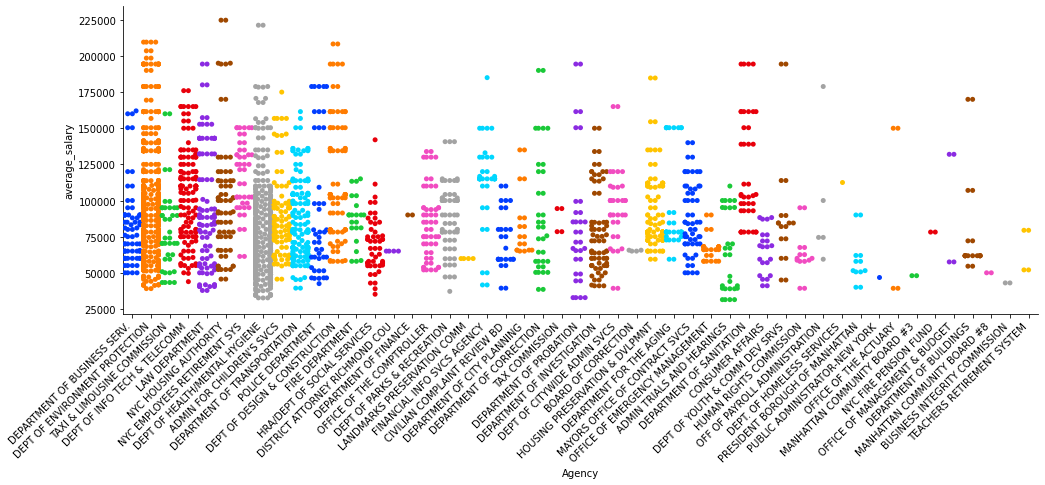

In [0]:
ax1 = sns.catplot(x='Agency', y="average_salary", kind="swarm", palette='bright', height=5,aspect=3, data=df);
ax1.set_xticklabels(rotation=45, horizontalalignment='right')

<p>The first graph shows the distributions of salary across different agencies. Generally, the ranges appear to be large for each agency, although there are cleary certain areas where the max is higher. It is difficult to observe any clear correlation between agency and average salary. </p>

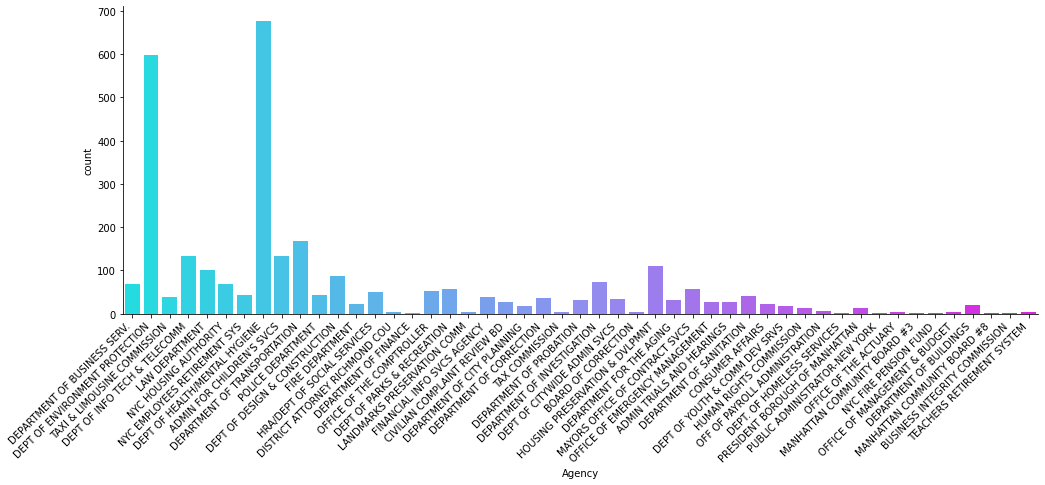

In [0]:
ax2 = sns.catplot(x="Agency", kind="count", palette='cool', height=5,aspect=3, data=df);
ax2.set_xticklabels(rotation=45, horizontalalignment='right')

This bar graph shows the different agencies and the number of job postings associated with each agency. This was done to show the distribution of jobs across agencies to determine how this could impact the results.

In [0]:
companies = df.groupby('Agency').agg(["count", 'max','min', "mean", "std", "sem"])['average_salary']
companies = companies.reset_index()

#fig = px.pie(companies, values='count', names='Agency', title = 'Postings for Public New York Agencies')
#fig.update_traces(textposition='inside')
#fig.show()

<h3>Image for Pie Chart of "Count of Postings for Public NYC Agencies"</h3>
<img src='https://raw.githubusercontent.com/zefwang/ds3000_project/master/postings_for_agencies_pie.png' alt='Posting count for agencies'/>
<p> This represents the same data as the previous bar graph, but as a pie chart Clearly, the most jobs are located in the Dept. of Health and the Dept. of Environmental Protection. This could impact the results based on how salaries work in these agencies.</p>

In [0]:
fig = px.scatter(df, x="Agency", y="Salary Range To", title="Agencies vs. Salary Cap", marginal_y="rug", marginal_x="histogram")

#fig.update_layout(autosize=True)
#fig.show()

<h3>Image for Graph of "Agencies vs Salary Cap"</h3>

<img src='https://raw.githubusercontent.com/zefwang/ds3000_project/master/agency_vs_salary.png' alt='Agencies vs Salary Cap'/>

<p>The graph represents the salary cap (max of the range) for some of the largest agencies and includes a distribution on the right, which shows that most salaries are located on the lower end of the range.</p>

In [0]:
fig = px.scatter(df, x="Business Title", y="Salary Range To", title="Job Title vs. Salary Cap", marginal_y="rug", marginal_x="histogram")

#fig.update_layout(autosize=True)
#fig.show()

<h3>Image for Graph of "Job Title vs Salary Cap"</h3>
<img src='https://raw.githubusercontent.com/zefwang/ds3000_project/master/job_title_vs_salary.png' alt='Job title vs salary cap'/>
<p>This graph is similar to the previous one, but is looking at the correlation between certain job titles and salary cap. As before, we can see that most salaries are on the lower end of the range, but certain titles, such as engineering have very high caps.</p>

In [0]:
import plotly.graph_objects as go
size = companies['count']

fig = go.Figure(data=[go.Scatter(
    x=companies['max'], y=companies['mean'],
    text = companies['Agency'],
    mode='markers',
    marker=dict(
        size=size,
        sizemode='area',
        sizeref=2.*max(size)/(60.**2),
        sizemin=4
    ))
])
#fig.update_layout(
    #title="Highest Paying Position and Average Pay at Each Agency",
    #xaxis_title="Average wage of highest paying position",
    #yaxis_title="Average wage of all positions",
    #font=dict(
        #family="Courier New, monospace",
        #size=18,
        #color="#7f7f7f"
    #)
#)
#fig.show()

<h3>Image for Graph of "Highest Paying Position and Average Pay at Each Agency"</h3>
<img src='https://raw.githubusercontent.com/zefwang/ds3000_project/master/highest_paying_position.png' alt='Highest and average pay at each agency'/>
<p>This graph shows the difference between the average wage at each company and the wage of the highest paying position. This represents the pay disperity amongst each agency. The size of each circle indicates the number of positions posted for each agency.</p>

In [0]:
# Executive Director = 1, Deputy Director = 2, Director = 3, Commisioner = 4, 
#Deputy Commissioner = 5, Chief = 6, Manager = 7, other = 8

In [0]:
def title(given):
    if 'executive director' in (str(given)).lower():
        return 1
    elif 'deputy director' in (str(given)).lower():
        return 2
    elif 'director' in (str(given)).lower():
        return 3
    elif 'deputy commissioner' in (str(given)).lower():
        return 5
    elif 'commissioner'in (str(given)).lower():
        return 4
    elif 'chief' in (str(given)).lower():
        return 6
    elif 'manager' in (str(given)).lower():
        return 7
    else:
        return 8

In [0]:
df['title'] = df['Business Title'].apply(title)

In [0]:
new_df = df["Agency"].values.reshape(-1,1)
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False)

encoded_df = encoder.fit_transform(new_df)
encoder.get_feature_names()
features_agency = pd.DataFrame(encoded_df, columns = encoder.get_feature_names())
df= pd.concat([df, features_agency], axis=1)

In [0]:
df = df.dropna()

In [0]:
new_df = df["Posting Type"].values.reshape(-1,1)

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False)

encoded_df = encoder.fit_transform(new_df)
encoder.get_feature_names()
features_df = pd.DataFrame(encoded_df, columns = encoder.get_feature_names())

target_type = df['average_salary']
df= pd.concat([df, features_df], axis=1)
features_agency_type = pd.concat([features_df, features_agency], axis = 1)

df_agency_type = pd.concat([features_agency_type, target_type],axis = 1)
df_agency_type = df_agency_type.dropna()
target_agency_type = df_agency_type['average_salary']
features_agency_type = df_agency_type.drop(['average_salary'], axis = 1)

df=df.dropna()

In [0]:
new_df = df["Level"].values.reshape(-1,1)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False)
encoded_df = encoder.fit_transform(new_df)
encoder.get_feature_names()
features_level = pd.DataFrame(encoded_df, columns = encoder.get_feature_names())
target_level = df['average_salary']
df= pd.concat([df, features_level], axis=1)
features_level_type = pd.concat([features_df, features_level], axis = 1)

In [0]:
df = df.drop(['Agency', 'Posting Type','Business Title', 'Civil Service Title', 'Level', 'Job Category','Full-Time/Part-Time indicator',
              'Division/Work Unit', 'Job Description','Minimum Qual Requirements', 'Preferred Skills', 'Additional Information', 'Hours/Shift',
              'Salary Range From', 'Salary Range To', 'Salary Frequency'], axis = 1)

In [0]:
df = df.dropna()

In [0]:
df_level_type = pd.concat([features_level_type, target_level],axis = 1)
df_level_type = df_level_type.dropna()
target_level_type = df_level_type['average_salary']
features_level_type = df_level_type.drop(['average_salary'], axis = 1)


In [0]:
df = df[df.applymap(np.isreal).any(1)]

title_data = df.groupby('title').agg(minimum=pd.NamedAgg(column='average_salary', aggfunc='min'), 
                                     maximum=pd.NamedAgg(column='average_salary', aggfunc='max',),
                                     sem=pd.NamedAgg(column='average_salary', aggfunc='sem',), 
                                     average=pd.NamedAgg(column='average_salary', aggfunc=np.mean))
#title_data = title_data.reset_index()

df = df.dropna()

In [0]:
title_data = title_data.reset_index()

In [0]:
import plotly.express as plt

#graph = plt.bar(title_data, x = "title", y = "average", error_y = "sem", template='none', width=500)
#graph.update_traces(marker= dict(line={"width":3}))

#graph.update_xaxes(title_font={"size":16}, tickfont = {"size":14, "color":"gray"})
#graph.update_yaxes(title_font={"size":16}, tickfont = {"size":14, "color":"gray"})

#graph.update_layout(
    #title="Pay Difference by Title",
    #xaxis_title="Title",
    #yaxis_title="Average Salary",
    #font=dict(
        #family="Courier New, monospace",
        #size=18,
        #color="#7f7f7f"
    #)
#)
#graph.show()

<h3>Image for Graph of "Pay Difference by Title"</h3>
<img src='https://raw.githubusercontent.com/zefwang/ds3000_project/master/pay_diff_title.png' alt='Difference in pay by job title'/>
<p>This graph shows the difference between the wages for different titles. It shows that certain titles, such as commissioner, have higher average salaries. Logically, at least this one observation makes sense for the title.</p>

In [0]:
titles = ['executive director', 'deputy director', 'director', 'commissioner', 'deputy commissioner', 'chief', 'manager', 'other' ]
titles

['executive director',
 'deputy director',
 'director',
 'commissioner',
 'deputy commissioner',
 'chief',
 'manager',
 'other']

In [0]:
bach_df = df.groupby('Bachelors').agg(minimum=pd.NamedAgg(column='average_salary', aggfunc='min'), 
                                     maximum=pd.NamedAgg(column='average_salary', aggfunc='max'), 
                                     average=pd.NamedAgg(column='average_salary', aggfunc=np.mean))
bach_df

,minimum,maximum,average
Bachelors,,,
0.0,31431.0,224749.0,85851.884302
1.0,34827.0,195000.0,90562.605760


In [0]:
Bachelors = df[df["Bachelors"] == 1]["average_salary"]
noBachelors = df[df["Bachelors"] == 0]["average_salary"]
results = stats.ttest_ind(Bachelors, noBachelors)

tstatistic = results[0]
pvalue = results[1]
pvalue

0.0021100848910894387

In [0]:
Masters = df[df["Masters"] == 1]["average_salary"]
noMasters = df[df["Masters"] == 0]["average_salary"]
results = stats.ttest_ind(Masters, noMasters)

tstatistic = results[0]
pvalue = results[1]
pvalue

1.675677486829061e-23

In [0]:
target = df['average_salary']
target

0        65485.0
1       162014.0
2        52496.0
3        52496.0
4       109850.0
          ...   
2401     42000.0
2402     97873.0
2403     97873.0
2404     55870.0
2405     55870.0
Name: average_salary, Length: 2156, dtype: float64

In [0]:
features = df.drop("average_salary", axis=1)
features

,Bachelors,Masters,title,x0_ADMIN FOR CHILDREN'S SVCS,x0_ADMIN TRIALS AND HEARINGS,x0_BOARD OF CORRECTION,x0_BUSINESS INTEGRITY COMMISSION,x0_CIVILIAN COMPLAINT REVIEW BD,x0_CONSUMER AFFAIRS,x0_DEPARTMENT FOR THE AGING,x0_DEPARTMENT OF BUILDINGS,x0_DEPARTMENT OF BUSINESS SERV.,x0_DEPARTMENT OF CITY PLANNING,x0_DEPARTMENT OF CORRECTION,x0_DEPARTMENT OF FINANCE,x0_DEPARTMENT OF INVESTIGATION,x0_DEPARTMENT OF PROBATION,x0_DEPARTMENT OF SANITATION,x0_DEPARTMENT OF TRANSPORTATION,x0_DEPT OF CITYWIDE ADMIN SVCS,x0_DEPT OF DESIGN & CONSTRUCTION,x0_DEPT OF ENVIRONMENT PROTECTION,x0_DEPT OF HEALTH/MENTAL HYGIENE,x0_DEPT OF INFO TECH & TELECOMM,x0_DEPT OF PARKS & RECREATION,x0_DEPT OF YOUTH & COMM DEV SRVS,x0_DEPT. OF HOMELESS SERVICES,x0_DISTRICT ATTORNEY RICHMOND COU,x0_FINANCIAL INFO SVCS AGENCY,x0_FIRE DEPARTMENT,x0_HOUSING PRESERVATION & DVLPMNT,x0_HRA/DEPT OF SOCIAL SERVICES,x0_HUMAN RIGHTS COMMISSION,x0_LANDMARKS PRESERVATION COMM,x0_LAW DEPARTMENT,x0_MANHATTAN COMMUNITY BOARD #3,x0_MANHATTAN COMMUNITY BOARD #8,x0_MAYORS OFFICE OF CONTRACT SVCS,x0_NYC EMPLOYEES RETIREMENT SYS,x0_NYC FIRE PENSION FUND,x0_NYC HOUSING AUTHORITY,x0_OFF OF PAYROLL ADMINISTRATION,x0_OFFICE OF EMERGENCY MANAGEMENT,x0_OFFICE OF MANAGEMENT & BUDGET,x0_OFFICE OF THE ACTUARY,x0_OFFICE OF THE COMPTROLLER,x0_POLICE DEPARTMENT,x0_PRESIDENT BOROUGH OF MANHATTAN,x0_PUBLIC ADMINISTRATOR-NEW YORK,x0_TAX COMMISSION,x0_TAXI & LIMOUSINE COMMISSION,x0_TEACHERS RETIREMENT SYSTEM,x0_External,x0_Internal,x0_0,x0_1,x0_2,x0_3,x0_3A,x0_4,x0_4A,x0_M1,x0_M2,x0_M3,x0_M4,x0_M5,x0_M6,x0_M7,x0_MY
0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2402,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2403,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

### 3.3. Model Construction
* If you proposed hypotheses, conduct your hypothesis tests
* For your machine learning question(s), split data into training, validation, and testing sets (or use cross-validation)
* Apply machine learning algorithms (apply at least three algorithms)
* Train your algorithms

In [0]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
def oneway_ANOVA(data,IV,DV):    
    info = data[data[IV] == 'DEPT OF INFO TECH & TELECOMM'][DV]
    preservation = data[data[IV] == 'HOUSING PRESERVATION & DVLPMNT'][DV]
    law = data[data[IV] == 'LAW DEPARTMENT'][DV]
    health = data[data[IV] == 'DEPT OF HEALTH/MENTAL HYGIENE'][DV]
    envir = data[data[IV] == 'DEPT OF ENVIRONMENT PROTECTION'][DV]
    transport = data[data[IV] == 'DEPARTMENT OF TRANSPORTATION'][DV]
    children = data[data[IV] == 'ADMIN FOR CHILDREN\'S SVCS'][DV]
    
    results = stats.f_oneway(info, preservation, law, health, envir, transport, children)
    fstatistic = results[0]
    pvalue = results[1]
    df1 = len(info) - 1
    df2 = (len(info) - 1) + (len(preservation) - 1) + (len(law) - 1)+ (len(health) - 1)+ (len(envir) - 1)+ (len(transport) - 1)+ (len(children) - 1)
    #print anova results
    print('----------------------- \n ONE-WAY ANOVA RESULTS \n----------------------- \n\nF-test \n-------')
    print('F(', df1, ",", df2, ") = ", round(fstatistic, 2), ', p = ', format(pvalue, '.4f'), '\n', sep="")

    levene_results = stats.levene(info, preservation, law, health, envir, transport, children)
    levene_true = (float(levene_results[1]) > .05)
           
    shapiro_one = stats.shapiro(info)
    shapiro_two = stats.shapiro(preservation)
    shapiro_three = stats.shapiro(law)
    shapiro_four = stats.shapiro(health)
    shapiro_five = stats.shapiro(envir)
    shapiro_six = stats.shapiro(transport)
    shapiro_seven = stats.shapiro(children)
    if(float(shapiro_one[1]) > .05):
        one_result = 'Assumption is met. p > .05'
    else:
        one_result = 'Assumption is violated. p < .05'
    if(float(shapiro_two[1]) > .05):
        two_result = 'Assumption is met. p > .05'
    else:
        two_result = 'Assumption is violated. p < .05'
    if(float(shapiro_three[1]) > .05):
        three_result = 'Assumption is met. p > .05'
    else:
        three_result = 'Assumption is violated. p < .05'
    if(float(shapiro_four[1]) > .05):
        four_result = 'Assumption is met. p > .05'
    else:
        four_result = 'Assumption is violated. p < .05'
    if(float(shapiro_five[1]) > .05):
        five_result = 'Assumption is met. p > .05'
    else:
        five_result = 'Assumption is violated. p < .05'
    if(float(shapiro_six[1]) > .05):
        six_result = 'Assumption is met. p > .05'
    else:
        six_result = 'Assumption is violated. p < .05'
    if(float(shapiro_seven[1]) > .05):
        seven_result = 'Assumption is met. p > .05'
    else:
        seven_result = 'Assumption is violated. p < .05'

    mc = MultiComparison(data[DV], data[IV])
    tukey_result = mc.tukeyhsd()
    print('Assumption Checks \n------------------- \nAssumption of Equality of Variances:\n\t', levene_results, sep="")
    if levene_true == True:
        print('\tAssumption is met. p > .05')
    else:
        print('\tAssumption is violated. p < .05')
    print('\nAssumption of Normality:\n\tInfo Tech :', shapiro_one, '\n\t\t', one_result, "\n\n\tPreservation : ", 
          shapiro_two, '\n\t\t', two_result, '\n\n\tLaw : ', shapiro_three, '\n\t\t', three_result,
         '\n\n\tHealth : ', shapiro_four, '\n\t\t', four_result,
         '\n\n\tEnvir : ', shapiro_five, '\n\t\t', five_result,
         '\n\n\tTransport : ', shapiro_six, '\n\t\t', six_result,
         '\n\n\tChildren : ', shapiro_seven, '\n\t\t', seven_result)
    print('\n','Post-hoc Tests\n----------------\n', tukey_result, sep = "")

In [0]:
oneway_ANOVA(combined, 'Agency', 'average_salary')

----------------------- 
 ONE-WAY ANOVA RESULTS 
----------------------- 

F-test 
-------
F(133,1909) = 33.13, p = 0.0000

Assumption Checks 
------------------- 
Assumption of Equality of Variances:
	LeveneResult(statistic=19.42808489230488, pvalue=4.217410637233407e-22)
	Assumption is violated. p < .05

Assumption of Normality:
	Info Tech : (0.9749206304550171, 0.014031989499926567) 
		 Assumption is violated. p < .05 

	Preservation :  (0.8210378289222717, 3.1418465051835653e-10) 
		 Assumption is violated. p < .05 

	Law :  (0.9174335598945618, 9.397172107128426e-06) 
		 Assumption is violated. p < .05 

	Health :  (0.8800021409988403, 2.386807847095454e-22) 
		 Assumption is violated. p < .05 

	Envir :  (0.9199823141098022, 2.7765296642187637e-17) 
		 Assumption is violated. p < .05 

	Transport :  (0.9478233456611633, 7.28599889043835e-06) 
		 Assumption is violated. p < .05 

	Children :  (0.8845653533935547, 9.53037115891675e-09) 
		 Assumption is violated. p < .05

Post-hoc 

In [0]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
def oneway_ANOVA(data,IV,DV):    
    one = data[data[IV] == 1][DV]
    two = data[data[IV] == 2][DV]
    three = data[data[IV] == 3][DV]
    four = data[data[IV] == 4][DV]
    five = data[data[IV] == 5][DV]
    six = data[data[IV] == 6][DV]
    seven = data[data[IV] == 7][DV]
    eight = data[data[IV] == 8][DV]
    
    results = stats.f_oneway(one, two, three, four, five, six, seven, eight)
    fstatistic = results[0]
    pvalue = results[1]
    #degrees of freedom
    df1 = len(one) - 1
    df2 = (len(one) - 1) + (len(two) - 1) + (len(three) - 1)+ (len(four) - 1)+ (len(five) - 1)+ (len(six) - 1)+ (len(seven) - 1)+ (len(eight) - 1)
    #print anova results
    print('----------------------- \n ONE-WAY ANOVA RESULTS \n----------------------- \n\nF-test \n-------')
    print('F(', df1, ",", df2, ") = ", round(fstatistic, 2), ', p = ', format(pvalue, '.4f'), '\n', sep="")

    levene_results = stats.levene(one, two, three, four, five, six, seven, eight)
    levene_true = (float(levene_results[1]) > .05)
           
    shapiro_one = stats.shapiro(one)
    shapiro_two = stats.shapiro(two)
    shapiro_three = stats.shapiro(three)
    shapiro_four = stats.shapiro(four)
    shapiro_five = stats.shapiro(five)
    shapiro_six = stats.shapiro(six)
    shapiro_seven = stats.shapiro(seven)
    shapiro_eight = stats.shapiro(eight)
    if(float(shapiro_one[1]) > .05):
        one_result = 'Assumption is met. p > .05'
    else:
        one_result = 'Assumption is violated. p < .05'
    if(float(shapiro_two[1]) > .05):
        two_result = 'Assumption is met. p > .05'
    else:
        two_result = 'Assumption is violated. p < .05'
    if(float(shapiro_three[1]) > .05):
        three_result = 'Assumption is met. p > .05'
    else:
        three_result = 'Assumption is violated. p < .05'
    if(float(shapiro_four[1]) > .05):
        four_result = 'Assumption is met. p > .05'
    else:
        four_result = 'Assumption is violated. p < .05'
    if(float(shapiro_five[1]) > .05):
        five_result = 'Assumption is met. p > .05'
    else:
        five_result = 'Assumption is violated. p < .05'
    if(float(shapiro_six[1]) > .05):
        six_result = 'Assumption is met. p > .05'
    else:
        six_result = 'Assumption is violated. p < .05'
    if(float(shapiro_seven[1]) > .05):
        seven_result = 'Assumption is met. p > .05'
    else:
        seven_result = 'Assumption is violated. p < .05'
    if(float(shapiro_eight[1]) > .05):
        eight_result = 'Assumption is met. p > .05'
    else:
        eight_result = 'Assumption is violated. p < .05'

    mc = MultiComparison(data[DV], data[IV])
    tukey_result = mc.tukeyhsd()
    print('Assumption Checks \n------------------- \nAssumption of Equality of Variances:\n\t', levene_results, sep="")
    if levene_true == True:
        print('\tAssumption is met. p > .05')
    else:
        print('\tAssumption is violated. p < .05')
    print('\nAssumption of Normality:\n\tOne :', shapiro_one, '\n\t\t', one_result, "\n\n\tTwo : ", 
          shapiro_two, '\n\t\t', two_result, '\n\n\tThree : ', shapiro_three, '\n\t\t', three_result,
         '\n\n\tFour : ', shapiro_four, '\n\t\t', four_result,
         '\n\n\tFive : ', shapiro_five, '\n\t\t', five_result,
         '\n\n\tSix : ', shapiro_six, '\n\t\t', six_result,
         '\n\n\tSeven : ', shapiro_seven, '\n\t\t', seven_result,
         '\n\n\tEight : ', shapiro_eight, '\n\t\t', eight_result)
    print('\n','Post-hoc Tests\n----------------\n', tukey_result, sep = "")

In [0]:
oneway_ANOVA(df, "title", "average_salary")

----------------------- 
 ONE-WAY ANOVA RESULTS 
----------------------- 

F-test 
-------
F(22,2148) = 120.23, p = 0.0000

Assumption Checks 
------------------- 
Assumption of Equality of Variances:
	LeveneResult(statistic=17.55882002998971, pvalue=9.008270541109547e-23)
	Assumption is violated. p < .05

Assumption of Normality:
	One : (0.7513746023178101, 7.026628736639395e-05) 
		 Assumption is violated. p < .05 

	Two :  (0.9344196915626526, 0.008153588511049747) 
		 Assumption is violated. p < .05 

	Three :  (0.9430285692214966, 8.527674071956426e-05) 
		 Assumption is violated. p < .05 

	Four :  (0.8905155062675476, 0.0013907967368140817) 
		 Assumption is violated. p < .05 

	Five :  (0.789070725440979, 3.2606778404442593e-05) 
		 Assumption is violated. p < .05 

	Six :  (0.9540359973907471, 0.03233221173286438) 
		 Assumption is violated. p < .05 

	Seven :  (0.9642466306686401, 2.646642315085046e-05) 
		 Assumption is violated. p < .05 

	Eight :  (0.947966456413269, 1.614

In [0]:
nonencode = features[['Bachelors', 'Masters', 'title']].copy()

In [0]:
features

,Bachelors,Masters,title,x0_ADMIN FOR CHILDREN'S SVCS,x0_ADMIN TRIALS AND HEARINGS,x0_BOARD OF CORRECTION,x0_BUSINESS INTEGRITY COMMISSION,x0_CIVILIAN COMPLAINT REVIEW BD,x0_CONSUMER AFFAIRS,x0_DEPARTMENT FOR THE AGING,x0_DEPARTMENT OF BUILDINGS,x0_DEPARTMENT OF BUSINESS SERV.,x0_DEPARTMENT OF CITY PLANNING,x0_DEPARTMENT OF CORRECTION,x0_DEPARTMENT OF FINANCE,x0_DEPARTMENT OF INVESTIGATION,x0_DEPARTMENT OF PROBATION,x0_DEPARTMENT OF SANITATION,x0_DEPARTMENT OF TRANSPORTATION,x0_DEPT OF CITYWIDE ADMIN SVCS,x0_DEPT OF DESIGN & CONSTRUCTION,x0_DEPT OF ENVIRONMENT PROTECTION,x0_DEPT OF HEALTH/MENTAL HYGIENE,x0_DEPT OF INFO TECH & TELECOMM,x0_DEPT OF PARKS & RECREATION,x0_DEPT OF YOUTH & COMM DEV SRVS,x0_DEPT. OF HOMELESS SERVICES,x0_DISTRICT ATTORNEY RICHMOND COU,x0_FINANCIAL INFO SVCS AGENCY,x0_FIRE DEPARTMENT,x0_HOUSING PRESERVATION & DVLPMNT,x0_HRA/DEPT OF SOCIAL SERVICES,x0_HUMAN RIGHTS COMMISSION,x0_LANDMARKS PRESERVATION COMM,x0_LAW DEPARTMENT,x0_MANHATTAN COMMUNITY BOARD #3,x0_MANHATTAN COMMUNITY BOARD #8,x0_MAYORS OFFICE OF CONTRACT SVCS,x0_NYC EMPLOYEES RETIREMENT SYS,x0_NYC FIRE PENSION FUND,x0_NYC HOUSING AUTHORITY,x0_OFF OF PAYROLL ADMINISTRATION,x0_OFFICE OF EMERGENCY MANAGEMENT,x0_OFFICE OF MANAGEMENT & BUDGET,x0_OFFICE OF THE ACTUARY,x0_OFFICE OF THE COMPTROLLER,x0_POLICE DEPARTMENT,x0_PRESIDENT BOROUGH OF MANHATTAN,x0_PUBLIC ADMINISTRATOR-NEW YORK,x0_TAX COMMISSION,x0_TAXI & LIMOUSINE COMMISSION,x0_TEACHERS RETIREMENT SYSTEM,x0_External,x0_Internal,x0_0,x0_1,x0_2,x0_3,x0_3A,x0_4,x0_4A,x0_M1,x0_M2,x0_M3,x0_M4,x0_M5,x0_M6,x0_M7,x0_MY
0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2402,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2403,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [0]:
features_agency_type = features_agency_type.drop(['x0_BUSINESS INTEGRITY COMMISSION', 'x0_TEACHERS RETIREMENT SYSTEM'], axis = 1)
features_agency_type.describe()


,x0_External,x0_Internal,x0_ADMIN FOR CHILDREN'S SVCS,x0_ADMIN TRIALS AND HEARINGS,x0_BOARD OF CORRECTION,x0_CIVILIAN COMPLAINT REVIEW BD,x0_CONSUMER AFFAIRS,x0_DEPARTMENT FOR THE AGING,x0_DEPARTMENT OF BUILDINGS,x0_DEPARTMENT OF BUSINESS SERV.,x0_DEPARTMENT OF CITY PLANNING,x0_DEPARTMENT OF CORRECTION,x0_DEPARTMENT OF FINANCE,x0_DEPARTMENT OF INVESTIGATION,x0_DEPARTMENT OF PROBATION,x0_DEPARTMENT OF SANITATION,x0_DEPARTMENT OF TRANSPORTATION,x0_DEPT OF CITYWIDE ADMIN SVCS,x0_DEPT OF DESIGN & CONSTRUCTION,x0_DEPT OF ENVIRONMENT PROTECTION,x0_DEPT OF HEALTH/MENTAL HYGIENE,x0_DEPT OF INFO TECH & TELECOMM,x0_DEPT OF PARKS & RECREATION,x0_DEPT OF YOUTH & COMM DEV SRVS,x0_DEPT. OF HOMELESS SERVICES,x0_DISTRICT ATTORNEY RICHMOND COU,x0_FINANCIAL INFO SVCS AGENCY,x0_FIRE DEPARTMENT,x0_HOUSING PRESERVATION & DVLPMNT,x0_HRA/DEPT OF SOCIAL SERVICES,x0_HUMAN RIGHTS COMMISSION,x0_LANDMARKS PRESERVATION COMM,x0_LAW DEPARTMENT,x0_MANHATTAN COMMUNITY BOARD #3,x0_MANHATTAN COMMUNITY BOARD #8,x0_MAYORS OFFICE OF CONTRACT SVCS,x0_NYC EMPLOYEES RETIREMENT SYS,x0_NYC FIRE PENSION FUND,x0_NYC HOUSING AUTHORITY,x0_OFF OF PAYROLL ADMINISTRATION,x0_OFFICE OF EMERGENCY MANAGEMENT,x0_OFFICE OF MANAGEMENT & BUDGET,x0_OFFICE OF THE ACTUARY,x0_OFFICE OF THE COMPTROLLER,x0_POLICE DEPARTMENT,x0_PRESIDENT BOROUGH OF MANHATTAN,x0_PUBLIC ADMINISTRATOR-NEW YORK,x0_TAX COMMISSION,x0_TAXI & LIMOUSINE COMMISSION
count,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.00000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000
mean,0.448462,0.551538,0.051538,0.010391,0.000831,0.009559,0.004988,0.010391,0.000831,0.021197,0.006234,0.008313,0.000416,0.024522,0.011222,0.013716,0.059019,0.01330,0.033250,0.218204,0.211554,0.050707,0.016625,0.006650,0.000416,0.000831,0.009975,0.006650,0.025353,0.011222,0.002909,0.000831,0.029510,0.000831,0.000831,0.019950,0.016209,0.000831,0.026185,0.001247,0.009144,0.000831,0.000831,0.020366,0.012469,0.004988,0.000416,0.001663,0.012053
std,0.497440,0.497440,0.221138,0.101425,0.028826,0.097324,0.070461,0.101425,0.028826,0.144071,0.078728,0.090812,0.020387,0.154695,0.105360,0.116332,0.235709,0.11458,0.179327,0.413113,0.408495,0.219443,0.127889,0.081293,0.020387,0.028826,0.099397,0.081293,0.157228,0.105360,0.053871,0.028826,0.169265,0.028826,0.028826,0.139858,0.126307,0.028826,0.159717,0.035297,0.095205,0.028826,0.028826,0.141277,0.110989,0.070461,0.020387,0.040748,0.109146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [0]:
features = features.drop(['x0_BUSINESS INTEGRITY COMMISSION', 'x0_TEACHERS RETIREMENT SYSTEM'], axis = 1)
features.describe()


,Bachelors,Masters,title,x0_ADMIN FOR CHILDREN'S SVCS,x0_ADMIN TRIALS AND HEARINGS,x0_BOARD OF CORRECTION,x0_CIVILIAN COMPLAINT REVIEW BD,x0_CONSUMER AFFAIRS,x0_DEPARTMENT FOR THE AGING,x0_DEPARTMENT OF BUILDINGS,x0_DEPARTMENT OF BUSINESS SERV.,x0_DEPARTMENT OF CITY PLANNING,x0_DEPARTMENT OF CORRECTION,x0_DEPARTMENT OF FINANCE,x0_DEPARTMENT OF INVESTIGATION,x0_DEPARTMENT OF PROBATION,x0_DEPARTMENT OF SANITATION,x0_DEPARTMENT OF TRANSPORTATION,x0_DEPT OF CITYWIDE ADMIN SVCS,x0_DEPT OF DESIGN & CONSTRUCTION,x0_DEPT OF ENVIRONMENT PROTECTION,x0_DEPT OF HEALTH/MENTAL HYGIENE,x0_DEPT OF INFO TECH & TELECOMM,x0_DEPT OF PARKS & RECREATION,x0_DEPT OF YOUTH & COMM DEV SRVS,x0_DEPT. OF HOMELESS SERVICES,x0_DISTRICT ATTORNEY RICHMOND COU,x0_FINANCIAL INFO SVCS AGENCY,x0_FIRE DEPARTMENT,x0_HOUSING PRESERVATION & DVLPMNT,x0_HRA/DEPT OF SOCIAL SERVICES,x0_HUMAN RIGHTS COMMISSION,x0_LANDMARKS PRESERVATION COMM,x0_LAW DEPARTMENT,x0_MANHATTAN COMMUNITY BOARD #3,x0_MANHATTAN COMMUNITY BOARD #8,x0_MAYORS OFFICE OF CONTRACT SVCS,x0_NYC EMPLOYEES RETIREMENT SYS,x0_NYC FIRE PENSION FUND,x0_NYC HOUSING AUTHORITY,x0_OFF OF PAYROLL ADMINISTRATION,x0_OFFICE OF EMERGENCY MANAGEMENT,x0_OFFICE OF MANAGEMENT & BUDGET,x0_OFFICE OF THE ACTUARY,x0_OFFICE OF THE COMPTROLLER,x0_POLICE DEPARTMENT,x0_PRESIDENT BOROUGH OF MANHATTAN,x0_PUBLIC ADMINISTRATOR-NEW YORK,x0_TAX COMMISSION,x0_TAXI & LIMOUSINE COMMISSION,x0_External,x0_Internal,x0_0,x0_1,x0_2,x0_3,x0_3A,x0_4,x0_4A,x0_M1,x0_M2,x0_M3,x0_M4,x0_M5,x0_M6,x0_M7,x0_MY
count,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000
mean,0.644249,0.074212,7.248145,0.053803,0.011596,0.000928,0.010668,0.005566,0.011596,0.000928,0.019944,0.005102,0.007421,0.000464,0.025046,0.011596,0.015306,0.064007,0.010204,0.030612,0.231447,0.207328,0.053340,0.012987,0.006494,0.000464,0.000928,0.009276,0.006494,0.017161,0.010204,0.001391,0.000928,0.023191,0.000928,0.000928,0.022263,0.018089,0.000928,0.029221,0.000464,0.006030,0.000464,0.000928,0.020872,0.013451,0.004638,0.000464,0.001855,0.012059,0.444805,0.555195,0.336271,0.176716,0.185065,0.094620,0.000928,0.017161,0.003247,0.075603,0.043135,0.034323,0.018089,0.005566,0.000928,0.004174,0.004174
std,0.478851,0.262176,1.663341,0.225682,0.107081,0.030450,0.102757,0.074414,0.107081,0.030450,0.139841,0.071263,0.085846,0.021537,0.156302,0.107081,0.122796,0.244823,0.100522,0.172305,0.421855,0.405487,0.224762,0.113244,0.080339,0.021537,0.030450,0.095889,0.080339,0.129903,0.100522,0.037285,0.030450,0.150545,0.030450,0.030450,0.147573,0.133304,0.030450,0.168464,0.021537,0.077435,0.021537,0.030450,0.142989,0.115222,0.067962,0.021537,0.043043,0.109176,0.497059,0.497059,0.472542,0.381517,0.388440,0.292757,0.030450,0.129903,0.056901,0.264423,0.203209,0.182099,0.133304,0.074414,0.030450,0.064490,0.064490
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [0]:
#for i in features.sum(axis = 0, skipna = True):
#  print (i)
#for i in df.isnull().sum():
#  print(i)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#split data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, random_state=3000)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR

estimators = {'Linear Regression': LinearRegression(),
             'Ridge': Ridge(),
             'Lasso': Lasso(),
             'KNeighborsRegressor': KNeighborsRegressor(),
             'Linear SVR': LinearSVR(max_iter=1000000),
             }

estimators.values()

dict_values([LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001), Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False), KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform'), LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000000,
          random_state=None, tol=0.0001, verbose=0)])

In [0]:
# Performance of training sets using 5 algorithms based on r-squared value

for key, value in estimators.items():
  model = value.fit(X = X_train, y = y_train)
  estimators[key] = model;

  print(key + ":")
  print("\tR-squared value for validation set: ", r2_score(y_train, model.predict(X_train)))

Linear Regression:
	R-squared value for validation set:  0.24906232155611308
Ridge:
	R-squared value for validation set:  0.24697599164674922
Lasso:
	R-squared value for validation set:  0.24905201750041261
KNeighborsRegressor:
	R-squared value for validation set:  0.4084494917396987
Linear SVR:
	R-squared value for validation set:  -1.6599162010836288


### 3.4. Model Evaluation
* Evaluate the performance of your algorithms on appropriate evaluation metrics, using your validation set
* Interpret your results from multiple models (and hypothesis tests, if any)


In [0]:
# Evaluating the algorithms using r-squared values on the validation set
# Performance on training sets is included for reference

for key, value in estimators.items():
  print(key + ":")
  print("\tR-squared value for training set: ", r2_score(y_train, value.predict(X_train)))
  print("\tR-squared value for validation set: ", r2_score(y_validate, value.predict(X_validate))) 

Linear Regression:
	R-squared value for training set:  0.24906232155611308
	R-squared value for validation set:  -1.2947609896775122e+22
Ridge:
	R-squared value for training set:  0.24697599164674922
	R-squared value for validation set:  0.1869174973130161
Lasso:
	R-squared value for training set:  0.24905201750041261
	R-squared value for validation set:  0.17837320648447286
KNeighborsRegressor:
	R-squared value for training set:  0.4084494917396987
	R-squared value for validation set:  0.10308991417041913
Linear SVR:
	R-squared value for training set:  -1.6599162010836288
	R-squared value for validation set:  -1.6949509641267455


<p>From these results, it is clear that there is not a strong correlation because the r-squared values are not close to 1 or -1. Certain results, such as the ones for LinearSVR show that it is not a good choice of model for this dataset since the r-squared valeus are so poor. Although the KNeighborsRegressor has a high score for the training set, the poor results for the validation set reveal that it is not a good choice either. The best two models here are the Ridge and Lasso regressions, which have small difference between the training and validation set scores.</p>

### 3.5. Model Optimization
* Tune your models using appropriate hyperparameters
* Explain why you are doing this (e.g., to avoid overfitting, etc.)

In [0]:
# Using a dictionary of dictionaries to keep track of testing results for each hypertuning method to display in 3.6

'''
tuningResults = {
  aTuningMethod: {
    X_train_val : method.transform(X_train)
    X_test_val : method.transform(X_test)
    model_one : value.fit(X = X_train_val, y = y_train)
    model_two...
  },
  anotherTuningMethod...
}
'''

tuning_results = {};

In [0]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor

select_from_model = {}

select = SelectFromModel(DecisionTreeRegressor(random_state = 3000), threshold = 'median')
select.fit(X_train, y_train)

#transform training and testing sets so only the selected features are retained
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

select_from_model["X_train_val"] = X_train_selected
select_from_model["X_test_val"] = X_test_selected

for key, value in estimators.items():
  model = value.fit(X=X_train_selected, y=y_train)
  select_from_model[key] = value

  print(key + " with selected features:")
  print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train_selected)))

tuning_results["SelectFromModel"] = select_from_model

Linear Regression with selected features:
	R-squared value for training set:  0.23102058389411162
Ridge with selected features:
	R-squared value for training set:  0.22974458452023805
Lasso with selected features:
	R-squared value for training set:  0.2310159397572692
KNeighborsRegressor with selected features:
	R-squared value for training set:  0.41744590510427215
Linear SVR with selected features:
	R-squared value for training set:  -1.6597937980293378


In [0]:
# Using the MinMaxScaler() using normalizaed variables
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = {}

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

min_max_scaler["X_train_val"] = X_train_scaled
min_max_scaler["X_test_val"] = X_test_scaled

for key, value in estimators.items():
  model = value.fit(X = X_train_scaled, y=y_train)
  min_max_scaler[key] = value

  print(key + ":")
  print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train_scaled)))
    
tuning_results["MinMaxScaler"] = min_max_scaler

Linear Regression:
	R-squared value for training set:  0.249054766101365
Ridge:
	R-squared value for training set:  0.24692765796065885
Lasso:
	R-squared value for training set:  0.2490519770493944
KNeighborsRegressor:
	R-squared value for training set:  0.3251345410481692
Linear SVR:
	R-squared value for training set:  -6.4404548105457895


In [0]:
# Using Recursive Feature Elimination
# Chose to test this with Ridge() because it produced the best R^2 values for training and validation after using Min/Max Scaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

rf_elimination = {}

select = RFE(DecisionTreeRegressor(random_state=3000), n_features_to_select=5)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

rf_elimination["X_train_val"] = X_train_selected
rf_elimination["X_test_val"] = X_test_selected

for key, value in estimators.items():
  model = value.fit(X=X_train_selected, y = y_train)
  rf_elimination[key] = value

  #print("Selected features after RFE:")
  #for i in range(len(features_level.columns)):
      #if select.get_support()[i] :
          #print("\t" + features_level.columns[i])

  print(key + " performance with selected features:")
  print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train_selected)))
    
tuning_results["RFElimination"] = rf_elimination

Linear Regression performance with selected features:
	R-squared value for training set:  0.20060269916552298
Ridge performance with selected features:
	R-squared value for training set:  0.2005998581840973
Lasso performance with selected features:
	R-squared value for training set:  0.2006026712301967
KNeighborsRegressor performance with selected features:
	R-squared value for training set:  0.2768936895782662
Linear SVR performance with selected features:
	R-squared value for training set:  -1.6740341447449345


In [0]:
# Use Grid Search to tune two parameters
from sklearn.model_selection import GridSearchCV

alphas=np.array([1, .1, .01, .001, .0001, 0])
param_grid = dict(alpha=alphas);
grid = GridSearchCV(Ridge(), param_grid, cv=10)
grid.fit(X = X_train, y = y_train)

print("Best parameters: ", grid.best_params_)

print("Training set score with best parameters: ", grid.best_score_)

Best parameters:  {'alpha': 1.0}
Training set score with best parameters:  0.18550267296828452


### 3.6. Model Testing
* Test your tuned algorithms using your testing set

*We noticed that in using SelectFromModel, RFE, and GridSearchCV, the data was actually being overfitted since the testing set's r-squared value was consistently higher than that of the training set.*

In [443]:
# Run through the three paramter tuning methods in the dict
for key in tuning_results: 
  print("Testing results from using " + key)

  method_results = tuning_results[key]

  X_train_given = method_results["X_train_val"]
  X_test_given = method_results["X_test_val"]
  
  for key in method_results:
    if key != "X_train_val" and key != "X_test_val":
      model = method_results[key].fit(X=X_train_given, y = y_train)
      print(key + " performance with selected features:")
      print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train_given)))
      print("\tR-squared value for testing set: ", r2_score(y_test, model.predict(X_test_given)))

  print()

print("Testing results from using GridSearchCV")
print("Training set score with best parameters: ", grid.best_score_)
print("Test set score: ", grid.score(X_test, y_test))

Testing results from using SelectFromModel
Linear Regression performance with selected features:
	R-squared value for training set:  0.23102058389411162
	R-squared value for testing set:  0.2531575991363946
Ridge performance with selected features:
	R-squared value for training set:  0.22974458452023805
	R-squared value for testing set:  0.25498395782560934
Lasso performance with selected features:
	R-squared value for training set:  0.2310159397572692
	R-squared value for testing set:  0.2534208839624008
KNeighborsRegressor performance with selected features:
	R-squared value for training set:  0.41744590510427215
	R-squared value for testing set:  0.2704627029348987
Linear SVR performance with selected features:
	R-squared value for training set:  -1.6611710573012828
	R-squared value for testing set:  -1.743653463058469

Testing results from using MinMaxScaler
Linear Regression performance with selected features:
	R-squared value for training set:  0.249054766101365
	R-squared value 

<p> From these testing results, it is clear that the best performance occured with the Ridge Regression using MinMaxScaler to hypertune the parameters. This is becuase the training and testing sets had the closest r<sup>2</sup> values without overfitting on the dataset (ie. testing r-squared > training r-squared). </p>

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
* Provide a summary of the steps you took to analyze your data and test your predictive model

In order to analyze the data, we first imported and cleaned the data. Since many of the columns in the dataset were not numerical, we manually translated some of the values in the columns to numbers by identifying certain phrases. In titles, we identified seven phrases to convert to value, 'Executive Director', 'Deputy Director', 'Director', 'Deputy Commissioner', 'Commisioner', 'Chief', and 'Manager.' Everything other title was given an 'other' category with a value of 7. Similarly, 'bachelors' and 'masters' categories were added based on whether or not these words were present in the minimum requirements listed. 

The posting type, level, and agency were also converted to numerical data using the OneHotEncoder. Additionally, since a lower and upper salary were given, we averaged those values to create an average_salary field.

Various hypothesis tests were utilized. In order to test whether the precense of 'bachelors' or 'masters' in the minimum qualifications effected the average salary, the t-test was utilized. There was found to be a significant relationship between the precense of 'bachelors' in the minimum qualification and the average salary (pvalue of 0.00211). The mean salary for positions that listed a bachelors as a minimum qualification was \$90,563, while the mean salary for positions which did not list it was \$85,852. Additionally, there was an even stronger relationship between the precense of 'masters' in the minimum qualification and the average salary. The mean salary for positions that did not list masters in the qualification was \$86,833,  while the mean salary for positions that did list masters was \$14,503 and a pvalue of 1.29e-21 was calculated. As hypothesized, positions that list having a bachelors or masters in the minimum qualifications pay significantly higher than positions that do not list them as requirements.

ANOVA testing was also completed between the different titles listed for positions. Out of these it was found the roles with 'commissioner' in the title paid significantly higher than executive director, deputy directer, director, manager, or unlabeled roles. Additionally all the roles with any of these titles paid significantly better than the unlabled roles. Directors, chiefs, and deputy commissioners also got paid significantly better than managers. Finally, chiefs are paid significantly better than deputy directors. This demonstrates that inferences on the pay can be made based upon the position's title.

A selection of the agencies with the most postings were compared using ANOVA testing to observe how salaries vary between agencies. The agencies included were Administration for Children's Services, Department of Transportation, Department of Environmental Protection, the Department of Health/Mental Hygiene, the Department of Information Technology and Telecommunications, the Housing Preservation & Development, and the Law Department. It was found through ANOVA testing that the Department of Health/Mental Hygiene pays significantly lower than the other agencies tested (with a mean salary of \$74,667). The Department of Information Technology and Telecommunications was also found to pay significantly higher than any of the other agencies (with a mean salary of \$104,518). Additionally, the Department of Environmental Protection was found to pay significantly higher than the Administration for Children's Services and the Department of Transportation. While these are just a subsection of New York City's public agencies, it is clear that significant differences in pay exist. As hypothesized, the Department of Information Technology and Telecommunications did pay significantly higher than the others.



* Intepret your findings from 3.4., 3.5, and 3.6
    * Which algorithms did you compare?

We tested the Logisitic Regression, Ridge, Lasso, KNeighborsRegressor, and Linear SVR algorithms. The one with the best results (and closest scores for training and testing sets) was the Ridge regression using MinMaxScaler to hypertune the parameters. 

* If you tested hypotheses, interpret the results. What does it mean to have significant/non-significant differences with regards to your data?


* End this section with a conclusion paragraph containing some pointers for future work 
    *(e.g., get more data, perform another analysis, etc.)

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
* Describe each team member's contributions to the report (who did what in each section)
* Remember this is a team effort!
* Each member of your team will provide peer evaluation of other team members. Your final grade on the project will be based on those peer evaluations. 

<h3>Introduction</h3>
<p>Since this was included from previous parts of the project, Caroline copied them over and Daniel formatted the questions/hypotheses.</p>
<h3>Method</h3>
<p>Once again, this was included largely in previous parts of the final project and was largely copying parts over. Daniel was mainly responsible for this section and formatting the information.</p>
<h3>Results</h3>
<p>This part was done equally by the three members of the team. For example, Caroline did much of the data wrangling, such as cleaning the data and using one-hot encoding. Preston and Caroline were responsible for determining and producing the different data visualizations. Finally, Daniel worked on constructing the 5 models, evaluating them using the validation sets, and optimizing using the different hyper-tuning strategies.</p> 
<h3>Discussion</h3>
<p>Caroline explained our hypothesis testing and interpreted the results. Preston explained our findings from testing the models and concluded the report.</p>